<a href="https://colab.research.google.com/github/devi777/CNN/blob/master/2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Character Detection Database 

MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision.
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Dataset: https://www.kaggle.com/oddrationale/mnist-in-csv

# Importing the Dataset

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


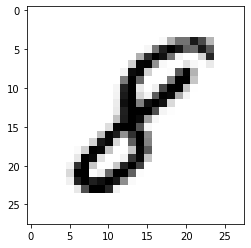

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


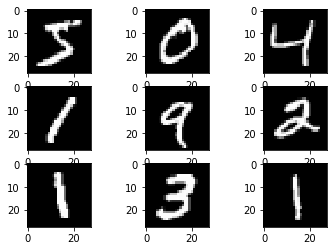

In [0]:
from matplotlib import pyplot
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figur

"You always have to give a 4D array as input to the CNN. So input data has a shape of (batch_size, height, width, depth), where the first dimension represents the batch size of the image and the other three dimensions represent dimensions of the image which are height, width, and depth. For some of you who are wondering what is the depth of the image, it’s nothing but the number of color channels. For example, an RGB image would have a depth of 3, and the greyscale image would have a depth of 1."

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
type(x_train)

numpy.ndarray

### CNN Inputs & Outputs
- You always have to feed a 4D array of shape (batch_size, height, width, depth) to the CNN.
- Output data from CNN is also a 4D array of shape (batch_size, height, width, depth).
- To add a Dense layer on top of the CNN layer, we have to change the 4D output of CNN to 2D using a Flatten layer.

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building the CNN Network

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10, activation = 'softmax'))

In [0]:
classifier.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Compiling the CNN
classifier.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 40s 659us/step - loss: 0.2070 - accuracy: 0.9381
Epoch 2/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.0849 - accuracy: 0.9741
Epoch 3/10
60000/60000 [==============================] - 33s 558us/step - loss: 0.0575 - accuracy: 0.9819
Epoch 4/10
60000/60000 [==============================] - 34s 570us/step - loss: 0.0445 - accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.0361 - accuracy: 0.9879
Epoch 6/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.0295 - accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 34s 575us/step - loss: 0.0249 - accuracy: 0.9913
Epoch 8/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.0229 - accuracy: 0.9917
Epoch 9/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.0199 - accuracy: 0.9929
Epoch 10/10
60000/60000 [============

In [0]:
classifier.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 110us/step


[0.05619290517440377, 0.9848999977111816]

Great. So, we got a beautiful accuracy of 98.6% on our model. 

## Predicting Individual Characters

1


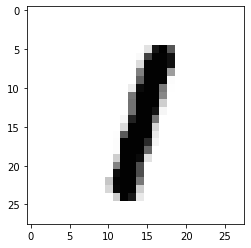

In [0]:
img_rows = 28
img_cols = 28
image_index = 7344
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = classifier.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

6


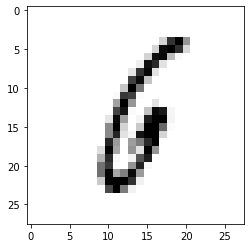

In [0]:
img_rows = 28
img_cols = 28
image_index = 3344
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = classifier.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())